In [1]:
import xarray as xr
import pandas as pd

import adriaClimIndUtils_pv as pv


In [2]:
ncRawDataFileName = "CMEMS_SST.nc"
pv.areaPerimeter =pd.read_csv ("area111.csv")
dataOutput = "CMEMS_SST_clipped_A1.nc"

In [3]:
# select area A
#pv.areaPerimeter = pd.read_csv('area111.csv')
#pv.dataInputNC = xr.open_dataset("CMEMS_SST.nc")
#pv.dataOutput= "AREA1_CMEMS_SST.nc"

In [4]:
rawData = xr.open_dataset(ncRawDataFileName)
clippedData = pv.acClipDataOnRegion(rawData, pv.areaPerimeter,dataOutput)

CMEMS SST Dimension: <xarray.Dataset>
Dimensions:  (time: 12053, lat: 216, lon: 241)
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float32 ...
  * lat      (lat) float32 37.02 37.06 37.1 37.15 ... 45.85 45.9 45.94 45.98
  * lon      (lon) float32 12.0 12.04 12.08 12.12 ... 21.88 21.92 21.96 22.0
Data variables:
    thetao   (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.8
Clipped Area Dimensions:            LON        LAT
0    12.903055  43.924718
1    12.818609  43.963191
2    12.764718  43.970273
3    12.753573  43.971000
4    12.740555  43.972218
..         ...        ...
107  14.674445  45.182218
108  14.724864  45.148609
109  14.752782  45.135691
110  14.800282  45.123055
111  14.831527  45.115418

[112 rows x 2 columns]
Reseized Area: <xarray.Dataset>
Dimensions:  (time: 12053, lat: 45, lon: 64)
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float3

In [5]:
ncRawDataFileName1 = "CMEMS_SST_clipped_A1.nc"
annualMapsNcFile = "CMEMS_SST_clipped_A1_AM.nc"

In [6]:
rawData1 = xr.open_dataset(ncRawDataFileName1)
#dataAM = pv.acGenerate2DAnnualMaps(rawData1,annualMapsNcFile)

In [7]:
clippedDataAM = pv.acGenerate2DAnnualMaps(rawData1, annualMapsNcFile)

annual mean  <xarray.Dataset>
Dimensions:  (lat: 45, lon: 64, year: 33)
Coordinates:
    depth    float32 1.018
  * lat      (lat) float32 43.94 43.98 44.02 44.06 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 14.67 14.71 14.75 14.79
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019
Data variables:
    thetao   (year, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
saving to  CMEMS_SST_clipped_A1_AM.nc
finished saving


In [8]:
clippedDataAM

<xarray.Dataset>
Dimensions:  (lat: 45, lon: 64, year: 33)
Coordinates:
    depth    float32 1.018
  * lat      (lat) float32 43.94 43.98 44.02 44.06 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 14.67 14.71 14.75 14.79
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019
Data variables:
    thetao   (year, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [9]:
NcFile1Doutput = "CMEMS_SST_clipped_A1_1d.nc"

In [10]:
clippedDataAM1D = pv.acGenerate1DAnnual(rawData1, NcFile1Doutput)

CMEMS SST Dimension: <xarray.Dataset>
Dimensions:  (time: 12053)
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float32 ...
Data variables:
    thetao   (time) float32 11.22 11.17 11.15 11.09 ... 14.41 14.21 14.02 13.86
saving to  CMEMS_SST_clipped_A1_1d.nc
finished saving


In [11]:
#clippedDataAMcsv

In [12]:
NcFile1DoutputCSV= "CMEMS_SST_clipped_A1_1dcsv.csv"

In [13]:
clippedDataAM1Dcsv = pv.acGenerate1DAnnualcsv(NcFile1Doutput,NcFile1DoutputCSV)

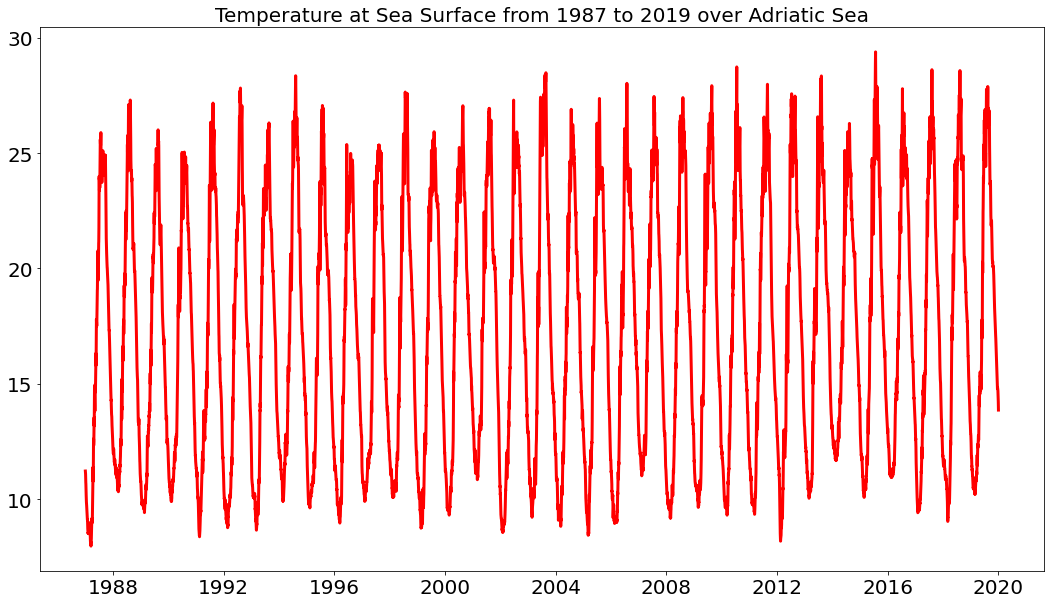

In [14]:
ts=pv.acGenerateDailyTimeSeries(NcFile1DoutputCSV)

In [15]:
ts1=pv.acGenerateDailyTimeSeriesSTD(NcFile1DoutputCSV)

In [16]:
ts1

5.621355862196479

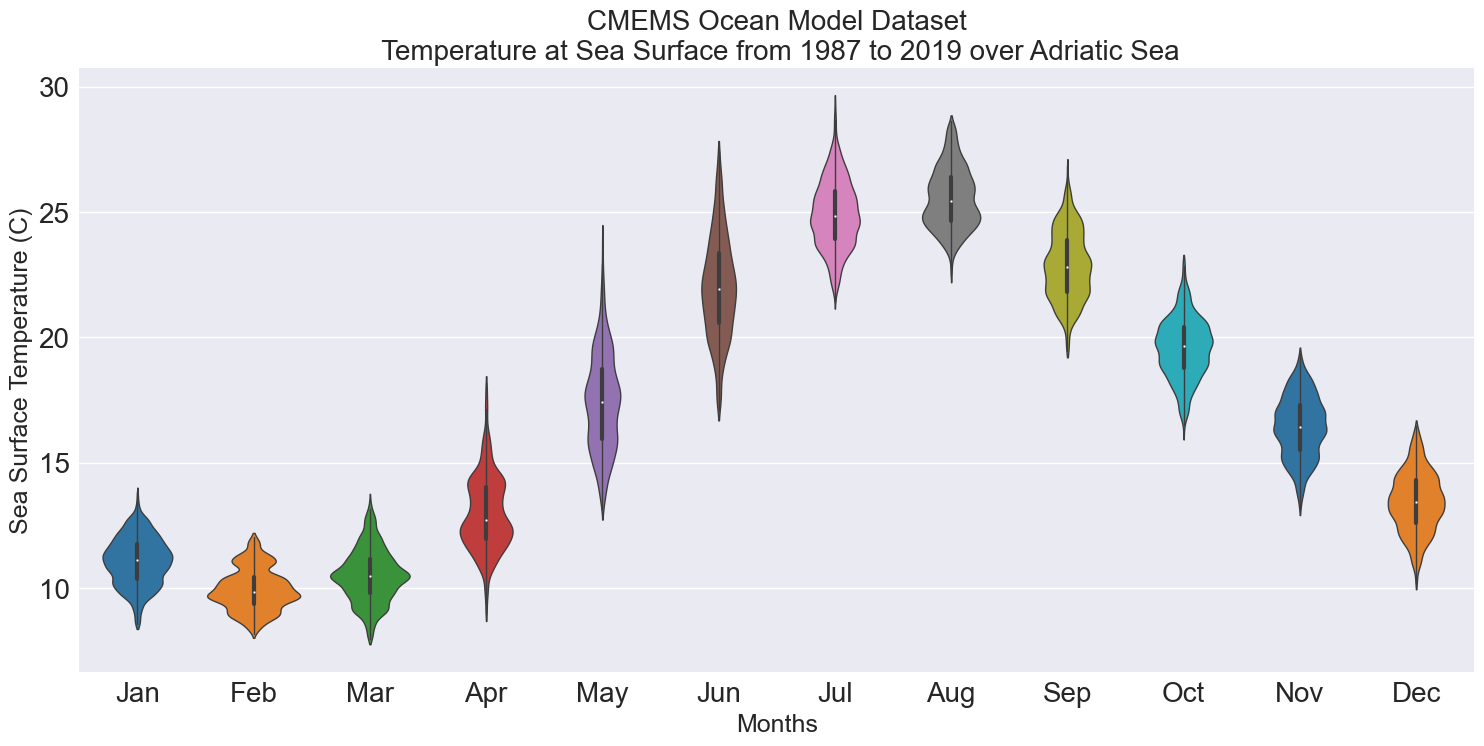

In [17]:
ts2=pv.acGenerateDailyTimeSeriesPLOT(NcFile1DoutputCSV)